In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn import tree
import time
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xg

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Age: The patient's age in years.

Sex: Gender of the individual, typically with 1 representing male and 0 representing female.

Chest Pain Type (Cp): A categorical variable describing the type of chest pain experienced, such as typical angina, atypical angina, non-anginal pain, or asymptomatic.

Resting Blood Pressure (Trestbps): The patient's resting blood pressure in millimeters of mercury (mm Hg).

Serum Cholesterol (Chol): The amount of cholesterol in the blood, measured in mg/dL.

Fasting Blood Sugar (Fbs): A binary value (0 or 1) indicating if the fasting blood sugar level is above a certain threshold (e.g., 120 mg/dL).

Resting Electrocardiographic Results (Restecg): The results of a resting electrocardiogram, which can indicate abnormalities.

Maximum Heart Rate Achieved (Thalach): The highest heart rate achieved during exercise, measured in beats per minute.

Exercise-Induced Angina (Exang): A binary indicator (0 or 1) for whether the patient experiences angina during exercise.

Oldpeak: Represents the ST depression induced by exercise relative to rest.

Slope: The slope of the peak exercise ST segment, a measure of the heart's electrical activity during exercise.

Number of Major Vessels (Ca): The count of major blood vessels (0–3) colored by fluoroscopy.

Thalassemia (Thal): Indicates the type of thalassemia identified, which can include normal, fixed defect, or reversible defect.

Target (T): The dependent variable that indicates the presence (1) or absence (0) of heart disease.

In [4]:
len(df)

303

In [5]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [6]:
df = df.drop_duplicates(keep=False)

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.475083,0.681063,0.960133,131.581395,246.737542,0.149502,0.524917,149.491694,0.328904,1.046512,1.395349,0.707641,2.315615,0.541528
std,9.013150,0.466841,1.032023,17.588752,51.674503,0.357176,0.526191,22.901618,0.470597,1.161822,0.616316,0.990408,0.613777,0.499102
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    int64  
 1   sex       301 non-null    int64  
 2   cp        301 non-null    int64  
 3   trestbps  301 non-null    int64  
 4   chol      301 non-null    int64  
 5   fbs       301 non-null    int64  
 6   restecg   301 non-null    int64  
 7   thalach   301 non-null    int64  
 8   exang     301 non-null    int64  
 9   oldpeak   301 non-null    float64
 10  slope     301 non-null    int64  
 11  ca        301 non-null    int64  
 12  thal      301 non-null    int64  
 13  target    301 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.3 KB


In [9]:
for i in df.columns:
    print(i, df[i].unique())

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 77 38]
sex [1 0]
cp [3 2 1 0]
trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs [1 0]
reste

In [43]:
df["trestbps"] = pd.cut(df["trestbps"], bins=[0, 119, 129, 139, 159, float("inf")], labels=["normal", "elevated", "hypertension_stage_1", "hypertension_stage_2", "hypertension_stage_3"])

df["chol"] = pd.cut(df["chol"], bins=[0, 199, 239, float("inf")], labels=["desirable", "borderline high", "high"])

df["thalach"] = pd.cut(df["thalach"], bins=[0, 99, 129, 159, 189, float("inf")], labels=["very low", "low", "average", "high", "very high"])

df["oldpeak"] = pd.cut(df["oldpeak"], bins=[-1, 0, 1, 2, 4, float("inf")],  labels=["normal", "slight", "moderate", "high", "very high"])

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,hypertension_stage_2,borderline high,1,0,average,0,high,0,0,1,1
1,37,1,2,hypertension_stage_1,high,0,1,high,0,high,0,0,2,1
2,41,0,1,hypertension_stage_1,borderline high,0,0,high,0,moderate,2,0,2,1
3,56,1,1,elevated,borderline high,0,1,high,0,slight,2,0,2,1
4,57,0,0,elevated,high,0,1,high,1,slight,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,hypertension_stage_2,high,0,1,low,1,slight,1,0,3,0
299,45,1,3,normal,high,0,1,average,0,moderate,1,0,3,0
300,68,1,0,hypertension_stage_2,desirable,1,1,average,0,high,1,2,3,0
301,57,1,0,hypertension_stage_1,desirable,0,1,low,1,moderate,1,1,3,0


In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [44]:
le = LabelEncoder()

features = ['trestbps', 'chol', 'thalach', 'oldpeak']
df[features] = df[features].apply(LabelEncoder().fit_transform)

In [15]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,2,0,1,0,0,0,0,0,0,1,1
1,37,1,2,1,2,0,1,1,0,0,0,0,2,1
2,41,0,1,1,0,0,0,1,0,1,2,0,2,1
3,56,1,1,0,0,0,1,1,0,3,2,0,2,1
4,57,0,0,0,2,0,1,1,1,3,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,2,2,0,1,2,1,3,1,0,3,0
299,45,1,3,4,2,0,1,0,0,1,1,0,3,0
300,68,1,0,2,1,1,1,0,0,0,1,2,3,0
301,57,1,0,1,1,0,1,2,1,1,1,1,3,0


In [16]:
X = df.drop(['target'], axis = 1)
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [17]:
from imblearn.over_sampling import SMOTE

In [21]:
from collections import Counter

Counter(Y)

Counter({1: 163, 0: 138})

In [19]:
sc = RobustScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [20]:
df['age'].skew()

-0.20479379952961643

In [22]:
model_params = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            'n_estimators': range(10, 101),
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 51),
            'min_samples_split': range(2, 11),
            'min_samples_leaf': range(1, 11),
            'max_features': ['sqrt', 'log2', None],
            'bootstrap': [True, False]
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(solver='liblinear', max_iter=1000, random_state=42),
        "params": {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'fit_intercept': [True, False],
            'class_weight': [None, 'balanced']
        }
    },
    "DecisionTree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    },
    "XGBoost": {
        "model": xg.XGBClassifier(random_state=42),
        "params": {
            "booster": ["gbtree"],
            "max_depth": [3, 4, 5, 6, 7, 8, 9],
            "min_child_weight": [1, 3, 5, 7, 10, 20],
            "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
            "n_estimators": [100, 200, 300, 500],
            "gamma": [0, 0.1, 0.2, 0.3, 0.5],
            "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
            "colsample_bytree": [0.6, 0.7, 0.8, 0.9, 1.0],
            "reg_alpha": [0, 0.01, 0.1, 1, 5, 10],
            "reg_lambda": [0.5, 1, 1.5, 2, 5, 10],
            "scale_pos_weight": [1, 2, 3, 5, 10],
            "tree_method": ["hist", "approx"]
        }
    }
}

In [23]:
results = []

for name, mp in model_params.items():
    print(f"Running RandomizedSearchCV for {name}")
    rs = RandomizedSearchCV(
        estimator=mp["model"],
        param_distributions=mp["params"],
        n_iter=18,      # number of sampled parameter settings
        cv=5,
        scoring="accuracy",
        n_jobs=-1,
        random_state=42
    )
    rs.fit(X_train_scaled, Y_train)

    y_pred = rs.best_estimator_.predict(X_test_scaled)
    acc = accuracy_score(Y_test, y_pred)

    results.append({
        'model': name,
        'best_params': rs.best_params_,
        'best_score': rs.best_score_,
        "test_accuracy": acc
    })

Running RandomizedSearchCV for RandomForest
Running RandomizedSearchCV for LogisticRegression
Running RandomizedSearchCV for DecisionTree
Running RandomizedSearchCV for XGBoost


In [45]:
results_df = pd.DataFrame(results).sort_values(by="test_accuracy", ascending=False)
print(results_df)

                model                                        best_params  \
0        RandomForest  {'n_estimators': 46, 'min_samples_split': 10, ...   
3             XGBoost  {'tree_method': 'approx', 'subsample': 0.8, 's...   
1  LogisticRegression  {'penalty': 'l2', 'fit_intercept': False, 'cla...   
2        DecisionTree  {'min_samples_split': 2, 'max_depth': 5, 'crit...   

   best_score  test_accuracy  
0    0.857143       0.868132  
3    0.833333       0.857143  
1    0.833333       0.791209  
2    0.790476       0.747253  


In [25]:
results_df['best_params'][0]

{'n_estimators': 46,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 3,
 'criterion': 'entropy',
 'bootstrap': True}

In [33]:
rf = RandomForestClassifier(n_estimators=  46,
 min_samples_split = 10,
 min_samples_leaf= 4,
 max_features= 'log2',
 max_depth= 3,
 criterion= 'entropy',
 bootstrap= True)
rf.fit(X_train_scaled, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=46)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score, precision_score, recall_score ,f1_score

In [35]:
y_train_pred = model_knn.predict(X_train_scaled)
y_test_pred = model_knn.predict(X_test_scaled)

print("Accuracy Score of Model on Training Data is =>", round(accuracy_score(Y_train, y_train_pred) * 100, 2), "%")
print("Accuracy Score of Model on Testing Data  is =>", round(accuracy_score(Y_test, y_test_pred) * 100, 2), "%")

print("F1 Score of the Model is =>", f1_score(Y_test, y_test_pred, average="micro"))
print("Recall Score of the Model is =>", recall_score(Y_test, y_test_pred, average="micro"))
print("Precision Score of the Model is =>", precision_score(Y_test, y_test_pred, average="micro"))

Accuracy Score of Model on Training Data is => 88.1 %
Accuracy Score of Model on Testing Data  is => 86.81 %
F1 Score of the Model is => 0.8681318681318682
Recall Score of the Model is => 0.8681318681318682
Precision Score of the Model is => 0.8681318681318682


In [26]:
def report(classifier):
    y_pred = classifier.predict(X_test_scaled)

    accuracy = accuracy_score(Y_test, y_pred)
    conf_m = confusion_matrix(Y_test, y_pred)
    report = classification_report(Y_test, y_pred)

    print(f"Accuracy: {accuracy}")

    print(f"Classification Report:")
    print(report)

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=classifier.classes_)
    disp.plot()
    plt.show()

Accuracy: 0.8681318681318682
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        41
           1       0.88      0.88      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



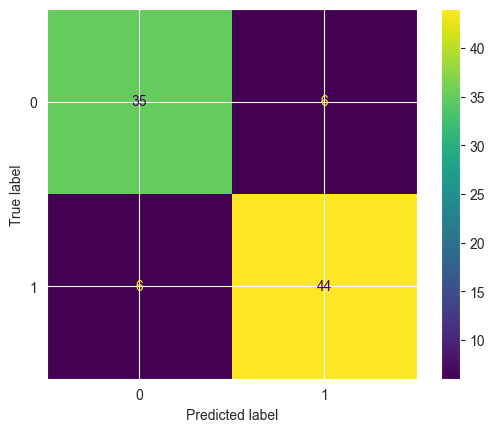

In [36]:
report(rf)

## Classification Visualization

In [37]:
def TSNE_plot(model_clf, data, labels, title):
    model_clf.fit(data, labels)
    transformed_data = model_clf.predict_proba(data)

    tsne_model = TSNE(n_components=2, random_state=0, init='random')
    tsne_data = tsne_model.fit_transform(transformed_data)

    tsne_data = np.vstack((tsne_data.T, labels)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

    sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")

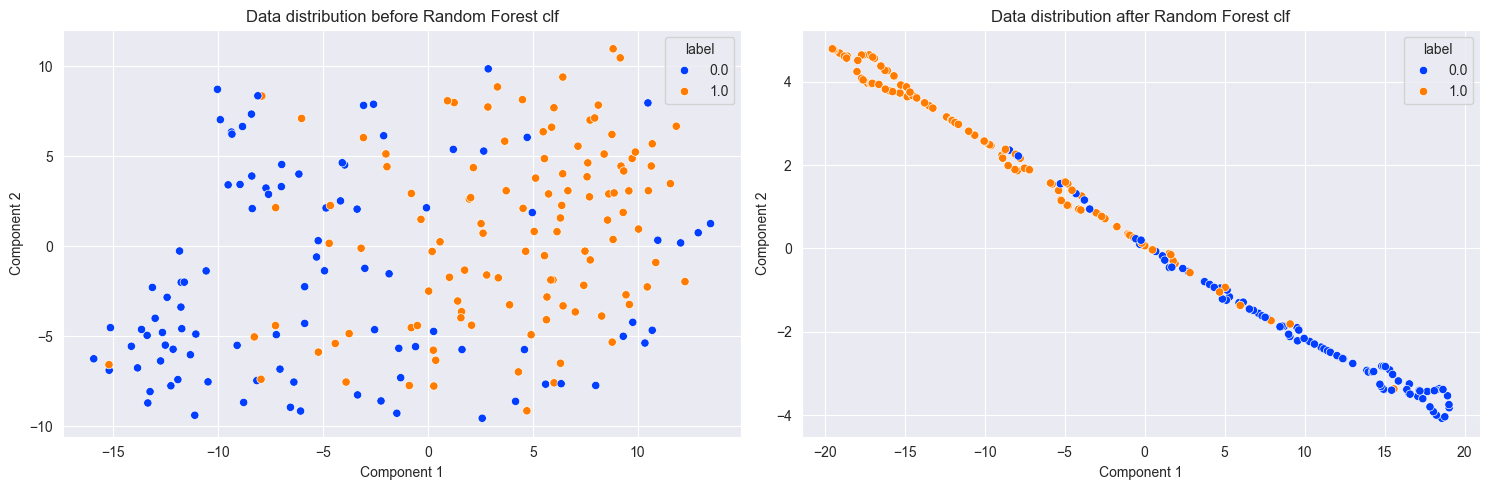

In [47]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
data_1000 = X_train_scaled[0:1000, :]
labels_1000 = Y_train.iloc[0:1000]

tsne_model = TSNE(n_components=2, random_state=0, init='random')
tsne_data = tsne_model.fit_transform(data_1000)

tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
plt.title("Data distribution before Random Forest clf")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.subplot(1, 2, 2)
TSNE_plot(rf, data_1000, labels_1000, "Data distribution after Random Forest clf")

plt.tight_layout()
plt.show()